In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import *  

PREPARAR DATA

In [2]:
#importar data
dfr=pd.read_csv("/Users/sofiaburzaco/Downloads/base_train.csv")
#elimino la variable unnamed que es el numero de observacion
dfr.drop(dfr.columns[0], axis=1, inplace=True)

In [3]:
#separo el nombre de las columnas
columns=list(dfr.columns)
datavalues=dfr[:].values

In [4]:
print(datavalues)
print(columns)

[[ 0.00000000e+00  1.45906176e+02  9.05767420e+01 ...  1.69984590e+01
   2.10944190e+01  1.23100835e+04]
 [-1.00000000e+00  9.27337440e+01  1.05905393e+02 ...  1.68352540e+01
   2.39576190e+01  2.20604405e+04]
 [ 0.00000000e+00  8.76202690e+01  9.69929740e+01 ...  2.79646040e+01
   3.29796880e+01  9.81631182e+03]
 ...
 [ 3.00000000e+00  1.04694181e+02  9.46730350e+01 ...  2.33232270e+01
   3.26410150e+01  1.98400185e+04]
 [-1.00000000e+00  1.24292164e+02  1.06041770e+02 ...  2.84698120e+01
   3.15725190e+01  2.62120015e+04]
 [ 0.00000000e+00  8.82132040e+01  9.53759440e+01 ...  2.66428280e+01
   2.36887280e+01  7.11252940e+03]]
['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [5]:
#Create the Data Frame
df=pd.DataFrame(data=datavalues,columns=columns)

In [6]:
print(df)
df.shape

        symboling  normalized-losses  wheel-base      length      width  \
0             0.0         145.906176   90.576742  164.257910  65.339016   
1            -1.0          92.733744  105.905393  187.256268  68.851686   
2             0.0          87.620269   96.992974  172.988044  65.355847   
3             2.0         107.851112   96.083754  166.746214  65.499869   
4             3.0         149.361994   99.346480  178.441091  66.346505   
...           ...                ...         ...         ...        ...   
799995        0.0          83.658143   94.464635  164.668036  64.364497   
799996        1.0         145.538826   96.587627  172.323536  69.384434   
799997        3.0         104.694181   94.673035  147.452392  63.834723   
799998       -1.0         124.292164  106.041770  191.237718  68.793550   
799999        0.0          88.213204   95.375944  169.304371  64.657615   

           height  curb-weight  engine-size      bore    stroke  \
0       55.257411  2119.914136  

(800000, 16)

In [7]:
df.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [8]:
print(df.dtypes)

symboling            float64
normalized-losses    float64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-size          float64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object


In [9]:
#convierto la variable categorica a integer para trabajarla como un ordinal encoding
df['symboling'] = df['symboling'].astype(int)

EDA

In [10]:
#summary
df.describe()

symboling  normalized-losses     wheel-base         length  \
count  800000.000000      800000.000000  800000.000000  800000.000000   
mean        0.665098         120.695944      98.066649     172.275287   
std         1.308882          35.132935       5.079410      11.110747   
min        -3.000000          40.534787      82.937917     135.551814   
25%         0.000000          95.420389      94.848705     166.163489   
50%         1.000000         113.360749      96.755825     172.258091   
75%         2.000000         142.491925     100.355036     178.959010   
max         3.000000         282.388034     120.491583     207.326158   

               width         height    curb-weight    engine-size  \
count  800000.000000  800000.000000  800000.000000  800000.000000   
mean       65.552667      53.874303    2450.043601     117.976889   
std         1.887964       2.255720     471.687720      29.559693   
min        61.012905      47.830953    1488.079382      47.038906   
25%        64.162091      52.322503    2094.919560      97.339422   
50%        65.350276      53.945935    2345.278650     109.119021   
75%        66.387566      55.307601    2748.879925     127.548995   
max        74.819282      62.157243    4300.658928     270.101636   

                bore         stroke  compression-ratio     horsepower  \
count  800000.000000  800000.000000      800000.000000  800000.000000   
mean        3.301791       3.239425          10.116760      95.236120   
std         0.262890       0.300451           3.910799      29.834217   
min         2.604898       1.710764         -12.104269      36.841507   
25%         3.104896       3.118024           8.646021      71.397541   
50%         3.250965       3.278219           9.000000      89.195405   
75%         3.528337       3.421338           9.359789     111.371022   
max         4.051284       4.184797          43.255678     232.513224   

            peak-rpm       city-mpg    highway-mpg          price  
count  800000.000000  800000.000000  800000.000000  800000.000000  
mean     5059.604030      26.528302      32.008529   11440.896655  
std       468.680836       5.876706       6.153806    5868.777693  
min      3627.875879       9.229116      14.015803    -824.303969  
25%      4800.000000      22.941222      28.286595    7461.950887  
50%      5107.808994      26.171015      31.909073    9142.228511  
75%      5355.318469      29.577919      35.478786   13976.676702  
max      6975.934291      58.519152      61.303145   43392.412788

In [12]:
#remuevo el valor price negativo --> inconsistencia
df = df.drop(df[df['price']<0].index)

In [11]:
df.shape

(800000, 16)

In [13]:
#head
df.head()

symboling  normalized-losses  wheel-base      length      width     height  \
0          0         145.906176   90.576742  164.257910  65.339016  55.257411   
1         -1          92.733744  105.905393  187.256268  68.851686  53.507441   
2          0          87.620269   96.992974  172.988044  65.355847  55.275391   
3          2         107.851112   96.083754  166.746214  65.499869  51.568524   
4          3         149.361994   99.346480  178.441091  66.346505  51.047962   

   curb-weight  engine-size      bore    stroke  compression-ratio  \
0  2119.914136   108.063442  3.659766  3.413379           7.431662   
1  3086.763228    89.138707  3.693169  3.436936           9.335766   
2  2353.623357   109.261573  3.481147  3.409794           8.625902   
3  3117.821531    99.979531  3.598569  3.461714          10.262772   
4  2602.065082   197.328140  3.069738  3.324375           9.444737   

   horsepower     peak-rpm   city-mpg  highway-mpg         price  
0  126.769640  4800.000000  16.998459    21.094419  12310.083546  
1   85.199136  5954.208367  16.835254    23.957619  22060.440471  
2   64.963110  5207.825450  27.964604    32.979688   9816.311817  
3   77.154984  4076.997829  26.991856    31.718865   8047.262818  
4  133.745785  4800.000000  14.244346    22.570794  14947.600683

In [14]:
#missing values
df.isnull().sum()

symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [15]:
df.info()
#no hay nulls ni missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799999 entries, 0 to 799999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   symboling          799999 non-null  int64  
 1   normalized-losses  799999 non-null  float64
 2   wheel-base         799999 non-null  float64
 3   length             799999 non-null  float64
 4   width              799999 non-null  float64
 5   height             799999 non-null  float64
 6   curb-weight        799999 non-null  float64
 7   engine-size        799999 non-null  float64
 8   bore               799999 non-null  float64
 9   stroke             799999 non-null  float64
 10  compression-ratio  799999 non-null  float64
 11  horsepower         799999 non-null  float64
 12  peak-rpm           799999 non-null  float64
 13  city-mpg           799999 non-null  float64
 14  highway-mpg        799999 non-null  float64
 15  price              799999 non-null  float64
dtypes:

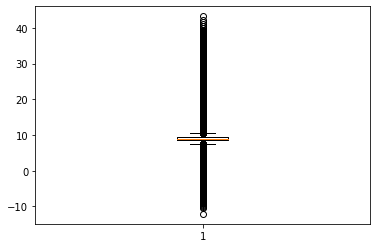

In [24]:
#OUTLIERS boxplot 
y = list(df['compression-ratio'])
plt.boxplot(y)
plt.show()

#sns.boxplot( data = df)

In [21]:
#contar cantidad de entradas outlier por columna
Q1 = df['stroke'].quantile(0.25)
Q3 = df['stroke'].quantile(0.75)
IQR = Q3 - Q1
((df['stroke'] < (Q1 - 1.5 * IQR)) | (df['stroke'] > (Q3 + 1.5 * IQR))).sum()

52741

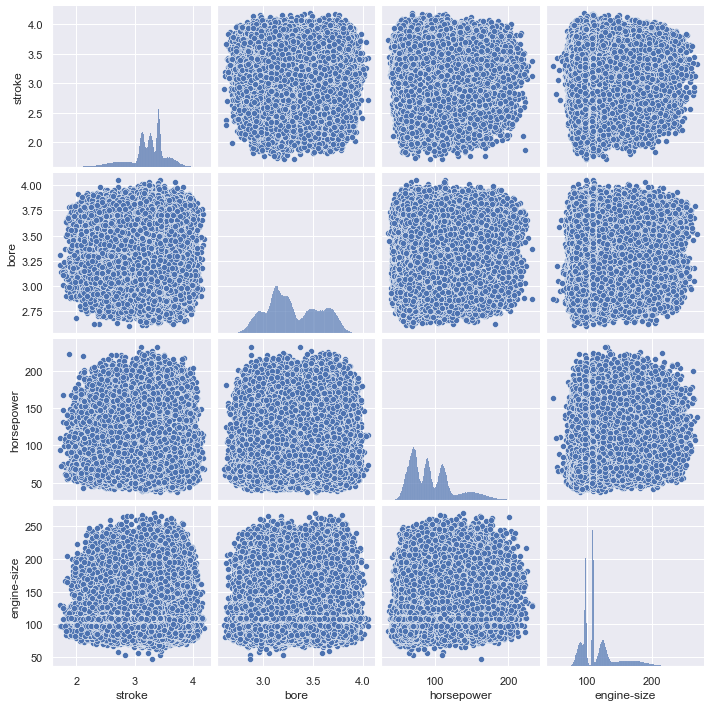

In [22]:
#plot the pair plot --> se ve que no tiene sentido el scatterplot
sns.set(rc = {'figure.figsize':(15,8)})
sns.pairplot(data = df, vars=['stroke','bore','horsepower','engine-size'])
plt.show()

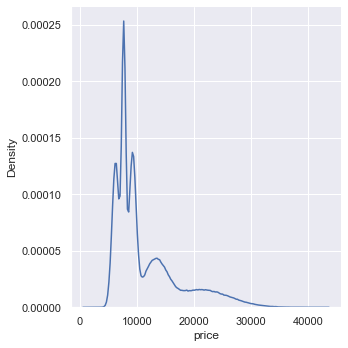

In [23]:
sns.displot(df, x="price", kind="kde", bw_adjust=.25)

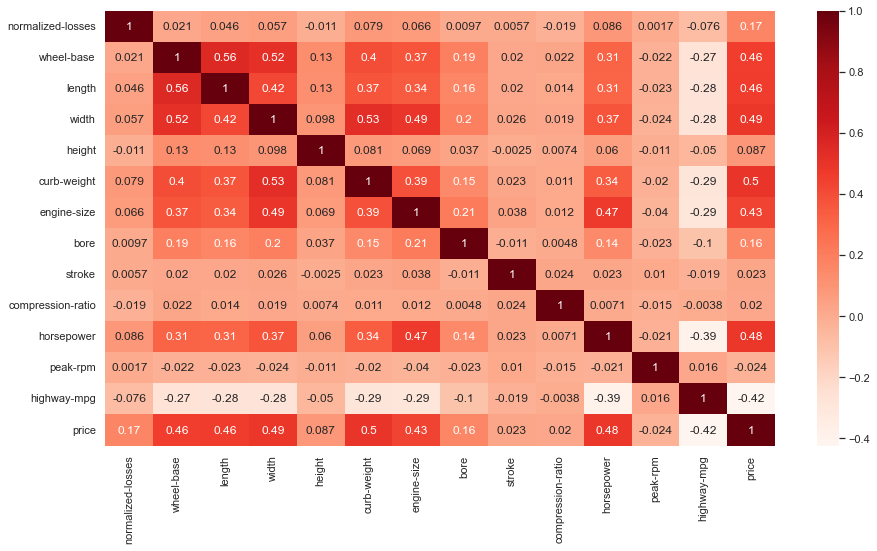

In [24]:
# Creating a matrix 
df[['normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']].corr()

#plot the correlation matrix of salary, balance and age in data dataframe.
sns.heatmap(df[['normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','highway-mpg','price']].corr(), annot=True, cmap = 'Reds')
plt.show()

In [25]:
df.corr()

symboling  normalized-losses  wheel-base    length  \
symboling           1.000000           0.257795   -0.259779 -0.164263   
normalized-losses   0.257795           1.000000    0.020640  0.045838   
wheel-base         -0.259779           0.020640    1.000000  0.558754   
length             -0.164263           0.045838    0.558754  1.000000   
width              -0.146322           0.056845    0.516869  0.419799   
height             -0.069861          -0.010833    0.128298  0.126326   
curb-weight        -0.116024           0.079419    0.399743  0.367039   
engine-size        -0.098365           0.066491    0.367143  0.338274   
bore               -0.059126           0.009662    0.193102  0.163922   
stroke             -0.004901           0.005714    0.020314  0.019613   
compression-ratio  -0.026462          -0.019163    0.021714  0.014440   
horsepower         -0.089520           0.086168    0.312411  0.306309   
peak-rpm            0.015684           0.001707   -0.022113 -0.022788   
city-mpg            0.083935          -0.077627   -0.289972 -0.299384   
highway-mpg         0.075368          -0.076102   -0.266213 -0.276166   
price              -0.129442           0.168337    0.457795  0.462016   

                      width    height  curb-weight  engine-size      bore  \
symboling         -0.146322 -0.069861    -0.116024    -0.098365 -0.059126   
normalized-losses  0.056845 -0.010833     0.079419     0.066491  0.009662   
wheel-base         0.516869  0.128298     0.399743     0.367143  0.193102   
length             0.419799  0.126326     0.367039     0.338274  0.163922   
width              1.000000  0.097804     0.530603     0.490293  0.198691   
height             0.097804  1.000000     0.080700     0.068797  0.036965   
curb-weight        0.530603  0.080700     1.000000     0.385785  0.148482   
engine-size        0.490293  0.068797     0.385785     1.000000  0.213376   
bore               0.198691  0.036965     0.148482     0.213376  1.000000   
stroke             0.025745 -0.002535     0.023409     0.037804 -0.010937   
compression-ratio  0.018649  0.007414     0.011367     0.011726  0.004816   
horsepower         0.366252  0.059701     0.335307     0.470136  0.144800   
peak-rpm          -0.024367 -0.010840    -0.020213    -0.040213 -0.022857   
city-mpg          -0.311020 -0.054251    -0.311354    -0.348723 -0.123852   
highway-mpg       -0.278889 -0.050198    -0.285881    -0.291333 -0.104921   
price              0.485197  0.086513     0.495009     0.434630  0.155758   

                     stroke  compression-ratio  horsepower  peak-rpm  \
symboling         -0.004901          -0.026462   -0.089520  0.015684   
normalized-losses  0.005714          -0.019163    0.086168  0.001707   
wheel-base         0.020314           0.021714    0.312411 -0.022113   
length             0.019613           0.014440    0.306309 -0.022788   
width              0.025745           0.018649    0.366252 -0.024367   
height            -0.002535           0.007414    0.059701 -0.010840   
curb-weight        0.023409           0.011367    0.335307 -0.020213   
engine-size        0.037804           0.011726    0.470136 -0.040213   
bore              -0.010937           0.004816    0.144800 -0.022857   
stroke             1.000000           0.024367    0.023161  0.010211   
compression-ratio  0.024367           1.000000    0.007133 -0.014759   
horsepower         0.023161           0.007133    1.000000 -0.021139   
peak-rpm           0.010211          -0.014759   -0.021139  1.000000   
city-mpg          -0.021630          -0.003395   -0.523091  0.018091   
highway-mpg       -0.019170          -0.003814   -0.391277  0.016097   
price              0.022818           0.020257    0.483229 -0.024439   

                   city-mpg  highway-mpg     price  
symboling          0.083935     0.075368 -0.129442  
normalized-losses -0.077627    -0.076102  0.168337  
wheel-base        -0.289972    -0.266213  0.457795  
length            -0.299384   

In [26]:
#distribucion symboling
df.symboling.value_counts()

 0    231625
 1    218574
 2    144244
-1     99475
 3     69611
-2     25067
-3     11403
Name: symboling, dtype: int64

/Users/sofiaburzaco/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


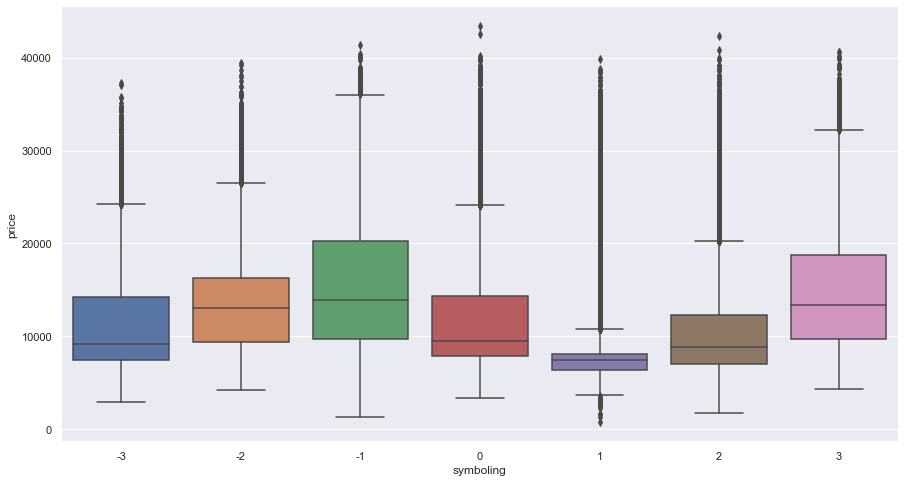

In [27]:
#price by symboling
df.groupby('symboling')['price'].mean()
df.groupby('symboling')['price'].median()

sns.boxplot(df.symboling, df.price)
plt.show()

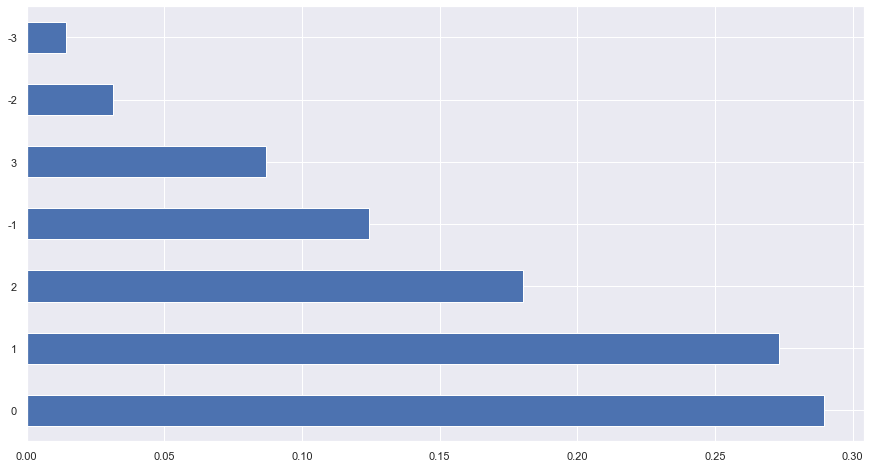

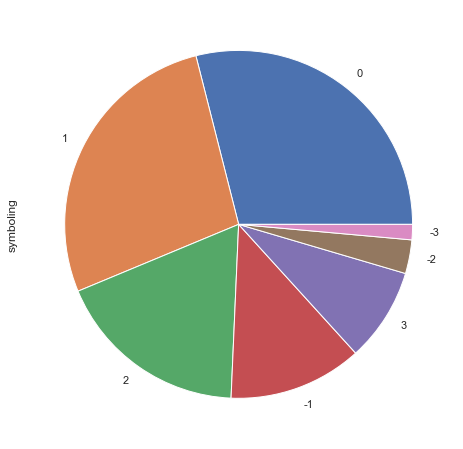

In [28]:
#variable categorica
df["symboling"].value_counts() 
df.symboling.value_counts(normalize=True).plot.barh()
plt.show()
df.symboling.value_counts(normalize=True).plot.pie()
plt.show()

SEPARO TRAIN Y TEST

In [21]:
#Separate Target Variable and Predictor Variables
TargetVariable='price'
Predictors=['symboling','normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg']
X=df[Predictors].values
y=df[TargetVariable].values

In [22]:
#Separo la data en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



REGRESION

In [24]:
#genero el modelo
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [25]:
Y_pred_multiple = regr.predict(X_train)
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
print('Valor de las pendientes o coeficientes "a":')
print(regr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(regr.intercept_)
print('Precisión del modelo en train:')
print(regr.score(X_train, y_train))

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Valor de las pendientes o coeficientes "a":
[-1.44798113e+02  1.86463980e+01  1.15303019e+02  7.88816086e+01
  3.24246560e+02  8.36441082e+00  2.33924886e+00  1.37085088e+01
 -3.92507095e+01 -2.99132659e+01  1.55960690e+01  3.35691331e+01
 -2.50913870e-02 -6.82260218e+01 -1.30229355e+02]
Valor de la intersección o coeficiente "b":
-41684.4087199606
Precisión del modelo en train:
0.48171138837460237


In [26]:
#prediccion
print(regr.score(X_test, y_test))

0.48186742406741123


ARBOLES DE DECISION

In [27]:
from sklearn.tree import DecisionTreeRegressor

arbol = DecisionTreeRegressor(random_state = 10)  
  
arbol.fit(X_train, y_train) 

arbol.score(X_test, y_test)

0.2759432423247883

In [29]:
from sklearn.model_selection import GridSearchCV


gs = GridSearchCV(arbol,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10),},
                  cv=5,
                  n_jobs=-1,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)
print(-gs.best_score_)

KeyboardInterrupt: 

In [29]:
arbol_nuevo = DecisionTreeRegressor(max_depth=10,
                                  min_samples_split=50)

arbol_nuevo.fit(X_train, y_train)

arbol_nuevo.score(X_test, y_test)

0.5924514101733391

In [30]:
from pandas._libs.parsers import TextReader
text_representation = tree.export_text(arbol_nuevo)
print(text_representation)

|--- feature_6 <= 2449.39
|   |--- feature_2 <= 97.82
|   |   |--- feature_11 <= 82.42
|   |   |   |--- feature_0 <= 2.50
|   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |--- feature_6 <= 2252.46
|   |   |   |   |   |   |--- feature_14 <= 31.27
|   |   |   |   |   |   |   |--- feature_0 <= -0.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 103.18
|   |   |   |   |   |   |   |   |   |--- feature_13 <= 26.52
|   |   |   |   |   |   |   |   |   |   |--- value: [13755.24]
|   |   |   |   |   |   |   |   |   |--- feature_13 >  26.52
|   |   |   |   |   |   |   |   |   |   |--- value: [10204.49]
|   |   |   |   |   |   |   |   |--- feature_1 >  103.18
|   |   |   |   |   |   |   |   |   |--- feature_7 <= 96.27
|   |   |   |   |   |   |   |   |   |   |--- value: [7810.58]
|   |   |   |   |   |   |   |   |   |--- feature_7 >  96.27
|   |   |   |   |   |   |   |   |   |   |--- value: [9811.91]
|   |   |   |   |   |   |   |--- feature_0 >  -0.50
|   |   |   |   |   |   |   |   |-

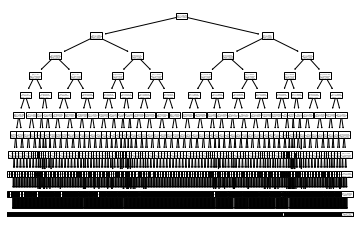

In [33]:
tree.plot_tree(arbol_nuevo)
plt.show()

CATBOOST

In [64]:
#! pip install catboost
import catboost as cb
import shap
from sklearn.inspection import permutation_importance


In [65]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [66]:
#creo el modelo
catboost = cb.CatBoostRegressor(loss_function='RMSE')

In [67]:
#grid search
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
catboost.grid_search(grid, train_dataset)

0:	learn: 12538.4490718	test: 12504.1231007	best: 12504.1231007 (0)	total: 82.7ms	remaining: 8.19s
1:	learn: 12218.2815989	test: 12183.0458019	best: 12183.0458019 (1)	total: 96ms	remaining: 4.7s
2:	learn: 11909.1557543	test: 11873.3344150	best: 11873.3344150 (2)	total: 107ms	remaining: 3.46s
3:	learn: 11610.1347674	test: 11573.6021192	best: 11573.6021192 (3)	total: 118ms	remaining: 2.83s
4:	learn: 11322.2185983	test: 11285.6197205	best: 11285.6197205 (4)	total: 127ms	remaining: 2.42s
5:	learn: 11044.9191483	test: 11008.0032711	best: 11008.0032711 (5)	total: 139ms	remaining: 2.17s
6:	learn: 10776.6536039	test: 10738.9033359	best: 10738.9033359 (6)	total: 150ms	remaining: 1.99s
7:	learn: 10515.9525631	test: 10477.4272854	best: 10477.4272854 (7)	total: 161ms	remaining: 1.85s
8:	learn: 10264.1073798	test: 10225.4671593	best: 10225.4671593 (8)	total: 171ms	remaining: 1.73s
9:	learn: 10021.9126527	test: 9982.6530355	best: 9982.6530355 (9)	total: 181ms	remaining: 1.63s
10:	learn: 9787.9301994

{'params': {'depth': 8,
  'iterations': 200,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.2},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [68]:
cat_search=GridSearchCV(estimator=catboost,param_grid=grid,scoring='neg_mean_squared_error',n_jobs=-1)

In [69]:
cat_search.fit(X_train,y_train)
cat_search.best_params_

0:	learn: 5808.1696630	total: 8.87ms	remaining: 878ms
1:	learn: 5753.7090990	total: 18.1ms	remaining: 887ms
2:	learn: 5701.1961213	total: 27.6ms	remaining: 892ms
3:	learn: 5651.3622790	total: 35.7ms	remaining: 856ms
4:	learn: 5603.0328773	total: 44.6ms	remaining: 847ms
5:	learn: 5555.8628392	total: 53.2ms	remaining: 834ms
6:	learn: 5511.0869631	total: 62.1ms	remaining: 825ms
7:	learn: 5466.9112283	total: 71.2ms	remaining: 818ms
8:	learn: 5425.0556424	total: 80.2ms	remaining: 810ms
9:	learn: 5383.5438804	total: 89.3ms	remaining: 804ms
10:	learn: 5344.0277581	total: 98ms	remaining: 793ms
11:	learn: 5305.2521119	total: 108ms	remaining: 789ms
12:	learn: 5268.4296226	total: 118ms	remaining: 792ms
13:	learn: 5232.7425957	total: 128ms	remaining: 786ms
14:	learn: 5197.6114037	total: 137ms	remaining: 777ms
15:	learn: 5163.7719833	total: 146ms	remaining: 767ms
16:	learn: 5130.9261490	total: 156ms	remaining: 762ms
17:	learn: 5098.6273638	total: 165ms	remaining: 751ms
18:	learn: 5068.1687986	total

{'depth': 8, 'iterations': 200, 'l2_leaf_reg': 3, 'learning_rate': 0.1}

In [70]:
#genero un nuevo modelo con los best params
best_cat=cb.CatBoostRegressor(depth=8, iterations=200,l2_leaf_reg=3, learning_rate=0.1)
CB=best_cat.fit(X_train,y_train)

0:	learn: 5571.9956066	total: 45.7ms	remaining: 9.09s
1:	learn: 5319.0250769	total: 70.1ms	remaining: 6.93s
2:	learn: 5099.4585483	total: 92.9ms	remaining: 6.1s
3:	learn: 4907.8335523	total: 112ms	remaining: 5.5s
4:	learn: 4746.7547807	total: 132ms	remaining: 5.14s
5:	learn: 4609.5395620	total: 153ms	remaining: 4.96s
6:	learn: 4482.7290015	total: 174ms	remaining: 4.81s
7:	learn: 4380.1817253	total: 196ms	remaining: 4.7s
8:	learn: 4285.5461123	total: 217ms	remaining: 4.61s
9:	learn: 4209.2983077	total: 237ms	remaining: 4.51s
10:	learn: 4143.5745465	total: 259ms	remaining: 4.44s
11:	learn: 4086.0758330	total: 280ms	remaining: 4.39s
12:	learn: 4037.8676543	total: 302ms	remaining: 4.35s
13:	learn: 3993.0471248	total: 323ms	remaining: 4.29s
14:	learn: 3953.1107516	total: 346ms	remaining: 4.27s
15:	learn: 3914.5898739	total: 367ms	remaining: 4.22s
16:	learn: 3880.8672328	total: 386ms	remaining: 4.16s
17:	learn: 3851.6577960	total: 407ms	remaining: 4.12s
18:	learn: 3825.8335827	total: 428ms	r

In [112]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
cat_pred = CB.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, cat_pred)))
r2 = r2_score(y_test, cat_pred)
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

NameError: name 'CB' is not defined

In [72]:
#Medir accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - cat_pred) / y_test)) * 100))

Accuracy 81.65272625131475


<AxesSubplot:>

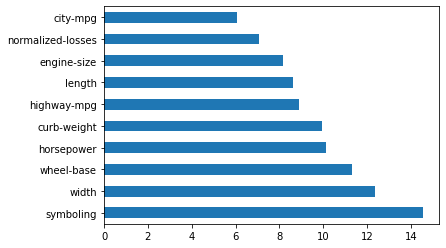

In [73]:
#Plot feature importance 
%matplotlib inline
feature_importances = pd.Series(CB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

ADABOOST

In [55]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
 

In [56]:

DTR=DecisionTreeRegressor(max_depth=10)
ada = AdaBoostRegressor(base_estimator=DTR)
 

In [57]:
ada_random_grid={'n_estimators':[10,20,40,60,80,100],'learning_rate':[.001,0.01,.1],'random_state':[1]}
ada_random=RandomizedSearchCV(estimator=ada,param_distributions=ada_random_grid,n_iter=10,cv=3,n_jobs=-1)

In [58]:
ada_random.fit(X_train,y_train)
ada_random.best_params_

/Users/sofiaburzaco/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'random_state': 1, 'n_estimators': 100, 'learning_rate': 0.01}

In [59]:
best_ada=ada_random.best_estimator_

In [60]:
ada_pred=best_ada.predict(X_test)

In [ ]:
rmse = (np.sqrt(mean_squared_error(y_test, ada_pred)))
r2 = r2_score(y_test, ada_pred)
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

In [61]:
#Medir accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - ada_pred) / y_test)) * 100))

Accuracy 80.29223046936923


<AxesSubplot:>

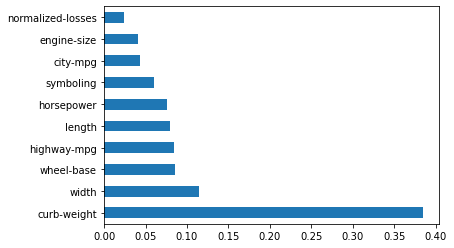

In [62]:
#Plot feature importance
%matplotlib inline
feature_importances = pd.Series(best_ada.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

RANDOM FOREST

In [1]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [45]:
from sklearn.model_selection import RandomizedSearchCV
# Cantidad de arboles
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 300, num = 5)]
# Cantidad de features considerados en cada split
max_features = ['auto', 'sqrt']
# Maxima cantidad de profundidad de los arboles
max_depth = [int(x) for x in np.linspace(10, 200, num = 5)]
max_depth.append(None)
# Cantidad minima de smaples requeridos para partir un nodo
min_samples_split = [2, 5, 10, 25, 50]
# cantidad minima de samples requeridos por nodo hoja
min_samples_leaf = [1, 2, 4, 10, 20]
# Metodo de seleccion de los samples
bootstrap = [True]
# Creo random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True],
 'max_depth': [10, 57, 105, 152, 200, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 10, 20],
 'min_samples_split': [2, 5, 10, 25, 50],
 'n_estimators': [20, 90, 160, 230, 300]}


In [46]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [47]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/Users/sofiaburzaco/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 57, 105, 152, 200,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 10, 20],
                                        'min_samples_split': [2, 5, 10, 25, 50],
                                        'n_estimators': [20, 90, 160, 230,
                                                         300]},
                   random_state=42, verbose=2)

In [48]:
rf_random.best_params_

{'n_estimators': 230,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 57,
 'bootstrap': True}

In [49]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [36]:
base_rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_rf.fit(X_train, y_train)
base_accuracy = evaluate(base_rf, X_train, y_train)

Model Performance
Average Error: 913.3630 degrees.
Accuracy = 92.35%.


In [51]:
best_rf = rf_random.best_estimator_
random_accuracy = evaluate(best_rf, X_train, y_train)

Model Performance
Average Error: 1406.8246 degrees.
Accuracy = 88.29%.


In [38]:
print('Mejora del {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of -3.83%.


In [24]:
from sklearn.model_selection import GridSearchCV

In [29]:
#Grid Search con cross validation
#Elijo los parametros del grid search en base a los resultados del random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,50,100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10,50,100]
}
# Modelo base
rf = RandomForestRegressor()
# Instanciar grid search
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 0)

In [30]:
# Fit grid search
grid_search.fit(X_train, y_train)
grid_search.best_params_

/Users/sofiaburzaco/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_train, y_train)

In [ ]:
print('Mejora del {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

LIGHT GBM

In [17]:
import lightgbm as lgb

In [18]:
lgb_model = lgb.LGBMRegressor(random_state=42)

In [19]:
lgbm_random_grid = {
    'task' : ['train', 'predict'],
    'boosting': ['dart','gbdt'],
    'objective': ['huber','rmse'],
    'metric': ['mae'],
    'num_iterations': [ 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500],
    'learning_rate':[ 0.05, 0.005, 0.0005],
    'max_depth' :[ 10, 20, 40,60,80,100, 120],
    'min_data_in_leaf':[50,80,90, 100,110, 120 ],
   'feature_fraction': [ 0.5,0.6, 0.7, 0.8, 0.9],
    'bagging_fraction': [ 0.5, 0.6, 0.7, 0.8, 0.9 ],
    'bagging_freq': [ 3,5, 8, 10, 15, 20 ],
    'num_leaves': [ 50, 80, 100, 150, 180, 200],
    'max_bins': [100,150, 200, 250, 300],
    'reg_alpha': [0.5,1, 3, 5, 10],
    'reg_lambda': [0.5,1, 3, 5, 10],
     
 }

In [34]:
from sklearn.model_selection import RandomizedSearchCV
random_lgb = RandomizedSearchCV(estimator=lgb_model, param_distributions = lgbm_random_grid, n_iter=60,cv=5, verbose=2, random_state=42, n_jobs=-1)

In [35]:
random_lgb.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sofiaburzaco/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/sofiaburzaco/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Unknown parameter: max_bins
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] Unknown parameter: max_bins
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: mi

/Users/sofiaburzaco/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/sofiaburzaco/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Unknown parameter: max_bins
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] Unknown parameter: max_bins
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min

/Users/sofiaburzaco/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/sofiaburzaco/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/sofiaburzaco/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/sofiaburzaco/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alia

[LightGBM] [Warning] Unknown parameter: max_bins
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] Unknown parameter: max_bins
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_

In [104]:
random_lgb.best_params_

{'task': 'predict',
 'reg_lambda': 10,
 'reg_alpha': 1,
 'objective': 'rmse',
 'num_leaves': 200,
 'num_iterations': 3500,
 'min_data_in_leaf': 80,
 'metric': 'mae',
 'max_depth': 100,
 'max_bins': 100,
 'learning_rate': 0.005,
 'feature_fraction': 0.9,
 'boosting': 'gbdt',
 'bagging_freq': 3,
 'bagging_fraction': 0.7}

In [27]:
best_lgb = lgb.LGBMRegressor(task='predict', objective='rmse',num_iterations=3500,
 min_data_in_leaf= 80, max_depth=100, learning_rate=0.005,feature_fraction=0.9, 
 boosting='gbdt',bagging_freq=3,bagging_fraction=0.7, max_bins=100, num_leaves=200, 
 reg_lambda= 10,reg_alpha=1,metric='mae', random_state=42)
best_lgb.fit(X_train,y_train)

/Users/sofiaburzaco/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Unknown parameter: max_bins
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


LGBMRegressor(bagging_fraction=0.7, bagging_freq=3, boosting='gbdt',
              feature_fraction=0.9, learning_rate=0.005, max_bins=100,
              max_depth=100, metric='mae', min_data_in_leaf=80,
              num_iterations=3500, num_leaves=200, objective='rmse',
              random_state=42, reg_alpha=1, reg_lambda=10, task='predict')

In [28]:
preds_lgb_model = best_lgb.predict(X_test)
print('Accuracy',100- (np.mean(np.abs((y_test - preds_lgb_model) / y_test)) * 100))

Accuracy 82.59416051154284


In [29]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, preds_lgb_model)
print(r2)

0.6850404812649369


<AxesSubplot:>

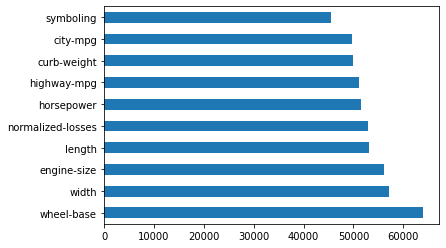

In [30]:
#Plot feature importance
%matplotlib inline
feature_importances = pd.Series(best_lgb.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

lightgbm con bayesian optimization

In [69]:
#! pip install bayesian_optimization 
from bayes_opt import BayesianOptimization
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score

GENERAR SOLUTION FILE

In [31]:
val=pd.read_csv("/Users/sofiaburzaco/Downloads/base_val.csv")

In [32]:
pred_val = best_lgb.predict(val.iloc[:,1:16])

In [33]:
solution = pd.DataFrame(data={"price": pred_val}).astype(str)
solution.index = val.iloc[:,0]
solution.to_csv("lgb4.csv", sep=',',index=True,  index_label='id')

In [34]:
#chequeo
print(solution)

                         price
Unnamed: 0                    
800000       7239.517222515844
800001      18149.158324889067
800002      23235.621057212426
800003      14307.335492870969
800004      14544.772616026517
...                        ...
999995       6128.771752388314
999996       6533.950593575257
999997      12425.018211776918
999998       7964.346844500925
999999       7583.425890004173

[200000 rows x 1 columns]
